In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mayavi import mlab


class readFile:
    def __init__(self, filename):
        # Initialize variables to store loaded data
        self.Nx = None
        self.xmax = None
        self.total_time = None
        self.store_steps = None
        self.psi_norm = None
        
        # Load arrays and parameters from the text file
        with open(filename, 'r') as f:
            lines = f.readlines()
            
            # Read parameters
            self.Nx = int(lines[0].split(": ")[1])
            self.xmax = float(lines[1].split(": ")[1].strip())
            self.total_time = float(lines[2].split(": ")[1].strip())
            self.store_steps = int(lines[3].split(": ")[1].strip())
            
            # Read the shape of the 3D array
            array3d_shape = tuple(map(int, lines[4].split(": ")[1].strip().strip('()').split(',')))
            #array3d_shape = (401,1064,1064)
            
            # Read arrays
            array1_start = lines.index("psi_norm:\n") + 1
            psi_norm = np.loadtxt(lines[array1_start:], delimiter=',')
            self.psi_norm = psi_norm.reshape(array3d_shape)
        
        
    def plot(self, ax, t = 0, L_norm=1, Z_norm=1, unit=1, time="ms", fixmaximum=0):
        plt.style.use("default")
        x = np.linspace(-self.xmax/2, self.xmax/2, self.Nx)
        y = np.linspace(-self.xmax/2, self.xmax/2, self.Nx)
        x,y = np.meshgrid(x,y)

    
        # Makes the contour plot:
        index = int((self.store_steps)/self.total_time*t)
        toplot=self.psi_norm[index]    
        from matplotlib import cm
        cont = ax.contourf(x/L_norm, y/L_norm, toplot, 100, cmap=cm.jet, linewidth=0, antialiased=False)
        cbar = plt.colorbar(cont,ax=ax)
        ax.set_xlabel("$x\ (mm)$",fontsize = 44)               # choose axes labels
        ax.set_ylabel("$y\ (mm)$",fontsize = 44)
        cbar.set_label('$|\psi|^2$',fontsize = 44)
        ax.tick_params(axis='both', which='major', labelsize=40)  # Increase tick label size
        cbar.ax.tick_params(labelsize=40)
        
            

    def final_plot2(self, ax, L_norm=1, Z_norm=1, unit=1, time="ms", fixmaximum=0):
        plt.style.use("default")
        total_time = self.total_time
        tvec = np.linspace(0, total_time, self.store_steps + 1)
        x = np.linspace(-self.xmax/2, self.xmax/2, self.Nx)
        tt, xx = np.meshgrid(tvec, x)
    
        toplot = np.abs(self.psi_norm)**2
        if fixmaximum > 0:
            toplot[toplot > fixmaximum] = fixmaximum
    
        cont = ax.contourf(xx / L_norm, tt / unit, toplot.T, 100, cmap=cm.jet, linewidth=0, antialiased=False)
        ax.set_xlabel('$z\ (mm)$', fontsize=54)  # axes labels, title, plot and axes range
        ax.set_ylabel('$t\ (ms)$', fontsize=44)
        ax.tick_params(axis='both', which='major', labelsize=50)  # Increase tick label size
        return cont
    
    def final_plot_xyt3(self,L_norm = 1, Z_norm = 1,unit = 1, contrast_vals= [0.1, 0.25]):

        mlab.figure(1,bgcolor=(0,0,0), size=(700, 700))
        #index = int((self.simulation.store_steps)/self.simulation.total_time*t)   

            
        toplot = self.psi_norm
        total_time = self.total_time
         
    
        L = self.xmax/2/L_norm
        N = self.Nx
    
        vol = mlab.pipeline.volume(mlab.pipeline.scalar_field(toplot.T), vmin= contrast_vals[0], vmax= contrast_vals[1])          
         
        mlab.outline()
         
         
     
        #mlab.axes(xlabel=x_latex, ylabel=y_latex, zlabel=z_latex,nb_labels=6 , ranges = (-L,L,-L,L,-Z,Z) )
        ax = mlab.axes(xlabel='$y\ (mm)$', ylabel='$x\ (mm)$', zlabel='$t\ (ms)$',nb_labels=3 , ranges = (-L,L,-L,L,0,total_time) )
        ax.axes.font_factor = 1.3
        ax.label_text_property.font_family = 'times'
        ax.title_text_property.font_family = 'times'
        ax.axes.label_format = '%-#6.1g'
        
        colorbar = mlab.colorbar(nb_labels=6,orientation = 'vertical')
        colorbar.scalar_bar_representation.position = [0.85, 0.1]
        colorbar_label = colorbar.scalar_bar.label_text_property
        colorbar_label.font_family = 'times'
        colorbar.scalar_bar.label_format = '%.2f'
        colorbar.scalar_bar.unconstrained_font_size = True
        colorbar_label.font_size = 10
        mlab.view(azimuth=60,elevation=60,distance=(N + N + N)/3 * 4)
        colorbar = mlab.colorbar(orientation = 'vertical')
        colorbar.scalar_bar_representation.position = [0.85, 0.1]
        #colorbar.data_range = (0, 1)
        #file = str(t) + '.png'
        #mlab.savefig(file)
        mlab.show()
        
        
    def final_plot_xyt2(self,L_norm = 1, Z_norm = 1,unit = 1,time="ms",fixmaximum = 0):
        plt.style.use("default")
        total_time = self.total_time
        tvec=np.linspace(0,total_time,self.store_steps + 1)
        x = np.linspace(-self.xmax/2, self.xmax/2, self.Nx)
        y = np.linspace(-self.xmax/2, self.xmax/2, self.Nx)
        xx,yy,tt=np.meshgrid(x,y,tvec)
        toplot = self.psi_norm
        toplot = toplot.T
        

    
        
        mlab.figure(bgcolor=(0,0,0), size=(1400, 1400))
        L = self.xmax/2/L_norm
        N = self.Nx
        
        contour = mlab.contour3d(yy,xx,tt,toplot,colormap='jet')
              
        #mlab.outline()
         
        x_latex = 'y'
        y_latex = 'x'
        z_latex = 't'
        
         
         
        mlab.axes(xlabel=x_latex, ylabel=y_latex, zlabel=z_latex,nb_labels=3 , ranges = (-L,L,-L,L,0,total_time) )
        #mlab.axes(xlabel='x [Å]', ylabel='y [Å]',nb_labels=6 , ranges = (-L,L,-L,L,-Z,Z) )
        #colorbar = mlab.colorbar(orientation = 'vertical')
        #colorbar.scalar_bar_representation.position = [0.85, 0.1]
        colorbar = mlab.colorbar(contour, orientation='vertical', title='Intensity', label_fmt='%.1f')
        colorbar.scalar_bar_representation.position = [0.85, 0.1]
        mlab.show()
        
        
#################################################################################################
#Plotting
#rd_file = readFile('2D_l=1.txt')

rd_file = readFile('l=1_2D_barrier_rho.txt')
        

C:\Users\Celanie Erwan\AppData\Local\Temp\ipykernel_21764\1344630458.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cont = ax.contourf(x/L_norm, y/L_norm, toplot, 100, cmap=cm.jet, linewidth=0, antialiased=False)
C:\Users\Celanie Erwan\AppData\Local\Temp\ipykernel_21764\1344630458.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cont = ax.contourf(x/L_norm, y/L_norm, toplot, 100, cmap=cm.jet, linewidth=0, antialiased=False)
C:\Users\Celanie Erwan\AppData\Local\Temp\ipykernel_21764\1344630458.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cont = ax.contourf(x/L_norm, y/L_norm, toplot, 100, cmap=cm.jet, linewidth=0, antialiased=False)
C:\Users\Celanie Erwan\AppData\Local\Temp\ipykernel_21764\1344630458.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cont = ax.contourf(x/L_norm, y/L_norm, toplot, 100, cmap=cm.jet, linewidth=0, antialiased=False)


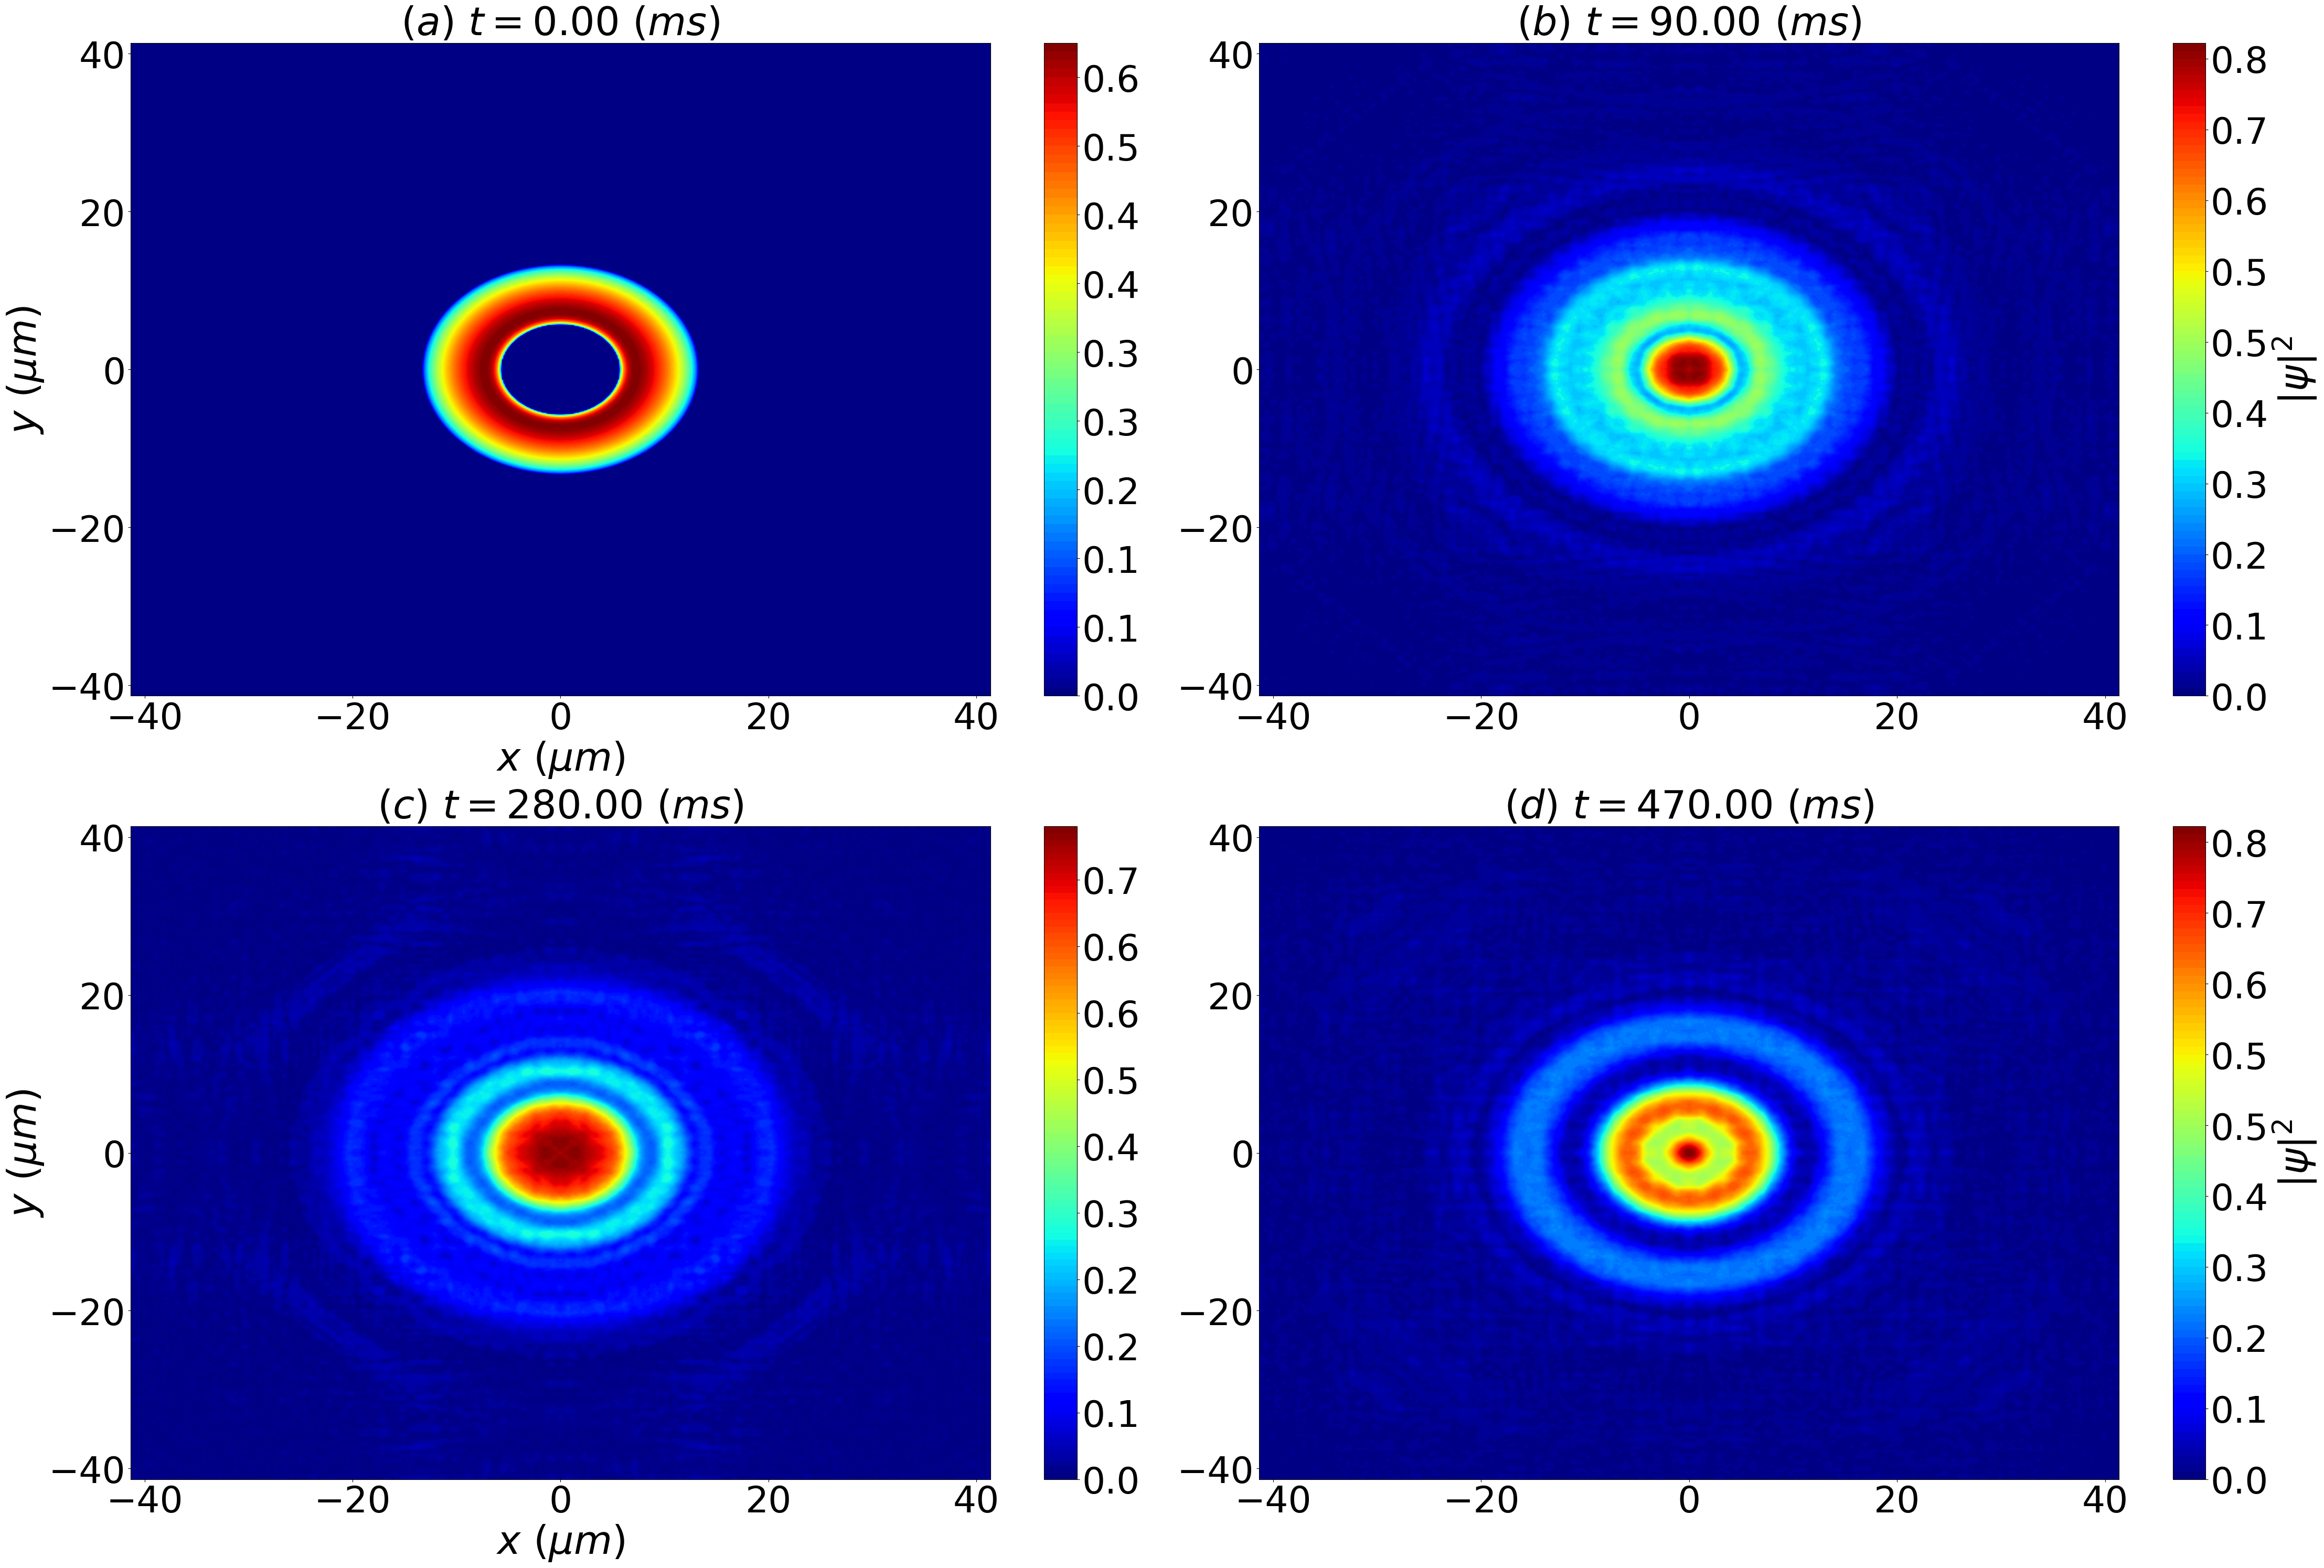

In [10]:


from matplotlib.ticker import FuncFormatter
font = 54
subfont = 50
def plot(rd, ax, t = 0, L_norm=1, Z_norm=1, unit=1, time="ms", fixmaximum=0,n=0):
    plt.style.use("default")
    x = np.linspace(-rd.xmax/2, rd.xmax/2, rd.Nx)
    y = np.linspace(-rd.xmax/2, rd.xmax/2, rd.Nx)
    x,y = np.meshgrid(x,y)


    # Makes the contour plot:
    index = int((rd.store_steps)/rd.total_time*t)
    toplot=rd.psi_norm[index]    
    from matplotlib import cm
    cont = ax.contourf(x/L_norm, y/L_norm, toplot, 100, cmap=cm.jet, linewidth=0, antialiased=False)
    cbar = plt.colorbar(cont,ax=ax)
    #ax.set_xlabel("$x\ (mm)$",fontsize = font)               # choose axes labels
    #ax.set_ylabel("$y\ (mm)$",fontsize = font)
    if n == 1 or n==3:
        cbar.set_label('$|\psi|^2$',fontsize = font)
    ax.tick_params(axis='both', which='major', labelsize=subfont)  # Increase tick label size
    cbar.ax.tick_params(labelsize=subfont)
        # Define a function to format the colorbar ticks
    def format_func(value, tick_number):
        return f'{value:.1f}'  # Adjust the number of decimal places here
    
    formatter = FuncFormatter(format_func)
    cbar.ax.yaxis.set_major_formatter(formatter)
    
        

def final_plot2(rd, ax, L_norm=1, Z_norm=1, unit=1, time="ms", fixmaximum=0):
    plt.style.use("default")
    total_time = rd.total_time
    tvec = np.linspace(0, total_time, rd.store_steps + 1)
    x = np.linspace(-rd.xmax/2, rd.xmax/2, rd.Nx)
    tt, xx = np.meshgrid(tvec, x)

    toplot = np.abs(rd.psi_norm)**2
    if fixmaximum > 0:
        toplot[toplot > fixmaximum] = fixmaximum

    cont = ax.contourf(xx / L_norm, tt / unit, toplot.T, 100, cmap=cm.jet, linewidth=0, antialiased=False)
    ax.set_xlabel('$z\ (mm)$', fontsize=54)  # axes labels, title, plot and axes range
    ax.set_ylabel('$t\ (s)$', fontsize=44)
    ax.tick_params(axis='both', which='major', labelsize=50)  # Increase tick label size
    return cont

def final_plot_xyt3(rd,L_norm = 1, Z_norm = 1,unit = 1, contrast_vals= [0.1, 0.25]):

    mlab.figure(fgcolor=(0.1,0.1,0.1),bgcolor=(1,1,1),size=(700, 700))
    #index = int((self.simulation.store_steps)/self.simulation.total_time*t)   

        
    toplot = rd.psi_norm
    total_time = rd.total_time
     

    L = rd.xmax/2/L_norm
    N = rd.Nx

    vol = mlab.pipeline.volume(mlab.pipeline.scalar_field(toplot.T), vmin= contrast_vals[0], vmax= contrast_vals[1])          
     
    #mlab.outline()
     
     
 
    #mlab.axes(xlabel=x_latex, ylabel=y_latex, zlabel=z_latex,nb_labels=6 , ranges = (-L,L,-L,L,-Z,Z) )
    ax = mlab.axes(xlabel='$y\ (mm)$', ylabel='$x\ (mm)$', zlabel='$t\ (s)$',nb_labels=3 , ranges = (-L,L,-L,L,0,total_time) )
    ax.axes.font_factor = 1.3
    ax.label_text_property.font_family = 'times'
    ax.title_text_property.font_family = 'times'
    ax.axes.label_format = '%-#6.1g'
    
    colorbar = mlab.colorbar(nb_labels=6,orientation = 'vertical')
    colorbar.scalar_bar_representation.position = [0.85, 0.1]
    colorbar_label = colorbar.scalar_bar.label_text_property
    colorbar_label.font_family = 'times'
    colorbar.scalar_bar.label_format = '%.2f'
    colorbar.scalar_bar.unconstrained_font_size = True
    colorbar_label.font_size = 10
    mlab.view(azimuth=60,elevation=60,distance=(N + N + N)/3 * 4)
    colorbar = mlab.colorbar(orientation = 'vertical')
    colorbar.scalar_bar_representation.position = [0.85, 0.1]
    #colorbar.data_range = (0, 1)
    #file = str(t) + '.png'
    #mlab.savefig(file)
    mlab.show()
    


def final_plot_x(rd,L_norm = 1, Z_norm = 1,unit = 1, figsize=(15, 15),time="ms"):
    
    from mpl_toolkits.mplot3d import Axes3D
    
    x = np.linspace(-rd.xmax/2, rd.xmax/2, rd.Nx)
    y = np.linspace(-rd.xmax/2, rd.xmax/2, rd.Nx)
    xx,yy=np.meshgrid(x,y)
    z = xx[0,:]
    total_time = rd.total_time
    tvec=np.linspace(0,total_time,rd.store_steps+1)
    tt,zz=np.meshgrid(tvec,z)
    plt.figure("Evolution of 1D cut at y=0")              # figure
    plt.clf()                       # clears the figure
    
    # Generates the plot
    mid = int(rd.Nx / 2) - 1
    toplot= rd.psi_norm[:,mid,:]
    toplot = toplot.T
    
    from matplotlib import cm
    plt.contourf(zz/Z_norm, tt/unit, toplot, 100, cmap=cm.jet, linewidth=0, antialiased=False)
    L = rd.xmax/2/L_norm
    N = rd.Nx

    cbar=plt.colorbar()               # colorbar
    
    plt.xlabel('$x\ (mm)$')               # choose axes labels, title of the plot and axes range
    plt.ylabel('$t\ (ms)$')
    cbar.set_label('$|\psi(x,y=0,t)|^2$',fontsize=14)
    plt.show()      # Displays figure on screen

hbar = 1.054571596e-34
uaumass = 1.66053873e-27
omega_rho = 1.0e3  # 1kHz

plt.style.use("default")



#final_plot_xyt2(rd_file)
#final_plot_xyt3(rd_file,L_norm = 1e-3,Z_norm=1e-3,unit=1e-3)

# Create subplots


fig, axs = plt.subplots(2, 2, figsize=(45, 30))
unit_conv =1e-6
t_unit = 1e-3
# 
t = 0 
cont_lithium = plot(rd_file,axs[0,0],t=t, L_norm=unit_conv, Z_norm=unit_conv, unit=t_unit)
axs[0,0].set_title('$(a)\ t= %.2f\ (ms)$' % (t/t_unit), fontsize=font)

# 


t = 0.09 
cont_sodium = plot(rd_file,axs[0,1],t=t, L_norm=unit_conv, Z_norm=unit_conv, unit=t_unit,n=1)
axs[0,1].set_title('$(b)\ t= %.2f\ (ms)$' % (t/t_unit), fontsize=font)

# 


t = 0.28 
cont_rubidium = plot(rd_file,axs[1,0],t=t,L_norm= unit_conv, Z_norm=unit_conv, unit=t_unit)
axs[1,0].set_title('$(c)\ t= %.2f\ (ms)$' % (t/t_unit), fontsize=font)


# 

t = 0.47 
cont_rubidium = plot(rd_file,axs[1,1], t = t,L_norm=unit_conv, Z_norm=unit_conv, unit=t_unit,n=3)
axs[1,1].set_title('$(d)\ t= %.2f\ (ms)$' % (t/t_unit), fontsize=font)

# Add colorbars with title for one row

#cbar2 = fig.colorbar(cont_sodium, ax=axs[0, 1])
#cbar2.set_label('$|\psi|^2$',fontsize = font)

#cbar4 = fig.colorbar(cont_rubidium, ax=axs[1, 1])
#cbar4.set_label('$|\psi|^2$',fontsize = font)

# Set individual axes labels for the second subplot in the first row
axs[0, 0].set_xlabel('$x\ (\mu m)$',fontsize = font)
axs[0, 0].set_ylabel('$y\ (\mu m)$',fontsize = font)
axs[1, 0].set_xlabel('$x\ (\mu m)$',fontsize = font)
axs[1, 0].set_ylabel('$y\ (\mu m)$',fontsize = font)

# Hide x labels and y labels for the other subplots in the first row
for ax in axs[0, :]:
    ax.label_outer()

# Adjust layout
plt.tight_layout()

plt.subplots_adjust(hspace=0.2,wspace=0.05)


# Add a single colorbar for all subplots
#cbar = fig.colorbar(cont_rubidium, ax=axs, orientation='vertical', fraction=0.02, pad=0.01)
#cbar.set_label('$|\psi|^2$', fontsize=font)
#cbar.ax.tick_params(labelsize=subfont)  # Increase colorbar tick label size


# Display the plot
plt.show()
#final_plot_x(rd_file,L_norm=1e-3, Z_norm=1e-3, unit=1e-3)
